# Loan Data from Prosper
## by Nada Alkhalaf

## Investigation Overview

> The goal of this presentation is to highlight some relationships between features.

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This data <a href="https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0">dictionary</a> explains the variables in the data set. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")
df = df [['LoanStatus','IncomeRange','EmploymentStatus','IsBorrowerHomeowner', 'Occupation'
        ,'ProsperPrincipalBorrowed', 'LoanOriginalAmount', 'IncomeVerifiable', 'Term', 'ProsperScore']]
df_clean = df.copy()
df_clean.drop(['ProsperPrincipalBorrowed'], axis=1, inplace = True)
df_clean.dropna(inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of LoanStatus )

> The type of data in the loan statuss are catagorical, and it vary as you can see

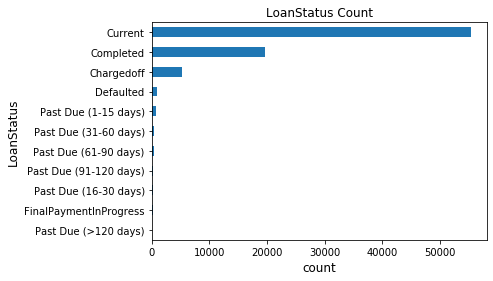

In [3]:
df_clean['LoanStatus'].value_counts()[12::-1].plot(kind='barh')
plt.title('LoanStatus Count', fontsize=12)
plt.xlabel('count', fontsize=12)
plt.ylabel('LoanStatus', fontsize=12)
plt.fontsize = 12
plt.figsize=(12,12)

## (HeatMap)

>* This plot shows the heatmap of four numerical variables, and two booleans.
* you can see a relationship between (term and loanorginamount), (prosperscore and incomeverifiable), (prosperscore and loanorginamount) (isBorrwerHomeOwner and loanorginamount)

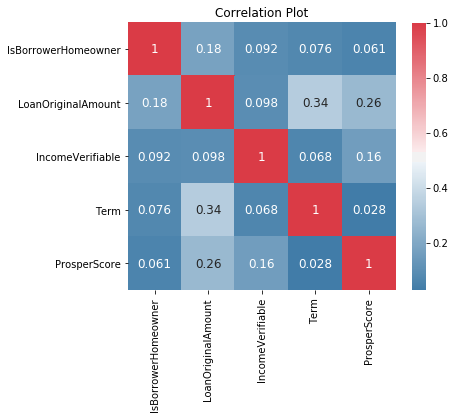

In [4]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 6 , 12 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    plt.title('Correlation Plot') 
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .41 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(df_clean)

## (How Term can affect the relationship of two variables)

> You can see that the term effect the relationship between ProsperScore and LoanOriginalAmount

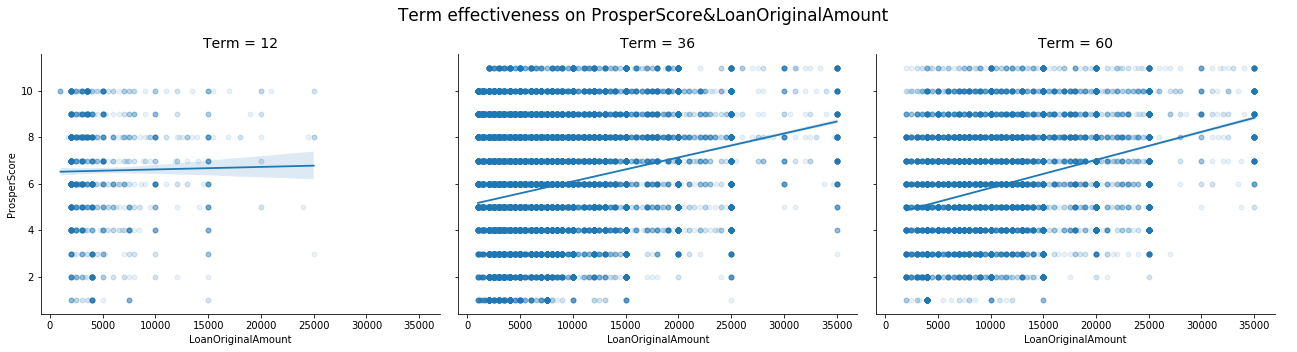

In [5]:
g=sns.FacetGrid(data=df_clean, aspect=1.2, height=5, col='Term')
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":18,"axes.labelsize":14})
g.map(sns.regplot, 'LoanOriginalAmount', 'ProsperScore', scatter_kws={'alpha':0.1});
#g.set_titles('{col_name}');
plt.suptitle('Term effectiveness on ProsperScore&LoanOriginalAmount');
g.add_legend();
plt.subplots_adjust(top=0.85)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 468678 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
